## import the modules


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [25]:
!pip install catboost


In [20]:
pip install --upgrade pip


  Using cached pip-23.1.2-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install --upgrade setuptools


Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install catboost==1.0.3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 3.2 MB/s eta 0:00:0000:0100:01m
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

## Reading the data from the csv

In [8]:

df = pd.read_csv (r'/Users/da_mac_41_/Downloads/diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


## Data Cleaning


In [4]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [7]:
df.duplicated().sum()

0

### 0-fair, 1 - Good, 2-ideal, 3- premium, 4- very good

In [35]:
df['cut'].unique()

array([2, 3, 1, 4, 0])

##### 0-D,1-E,2-F,3-G,4-H,5-I,6-J

In [34]:
df['color'].unique()

array([1, 5, 6, 4, 2, 3, 0])

## 0-I1 , 1-IF, 2-SI1,3-SI2, 4-VS1,5-VS2,6-VVS1,7-VVS2

In [33]:
df['clarity'].unique()

array([3, 2, 4, 5, 7, 6, 0, 1])

In [32]:
label_encoder = preprocessing.LabelEncoder()

df['cut']= label_encoder.fit_transform(df['cut'])
df['color']= label_encoder.fit_transform(df['color'])
df['clarity']= label_encoder.fit_transform(df['clarity'])

In [36]:
df.describe()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,2.553003,2.594197,3.835150,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.027708,1.701105,1.724591,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [38]:
df.skew()

Unnamed: 0    0.000000
carat         1.116646
cut          -0.187443
color         0.189366
clarity       0.174917
depth        -0.082294
table         0.796896
price         1.618395
x             0.378676
y             2.434167
z             1.522423
dtype: float64

<Axes: ylabel='Density'>

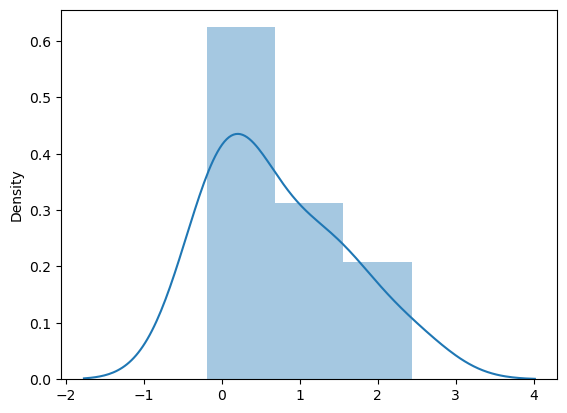

In [39]:
sk = df.skew()
sns.distplot(sk)

In [40]:
df.kurtosis()

Unnamed: 0    -1.200000
carat          1.256635
cut           -0.465953
color         -0.866762
clarity       -0.820874
depth          5.739415
table          2.801857
price          2.177696
x             -0.618161
y             91.214557
z             47.086619
dtype: float64

<Axes: >

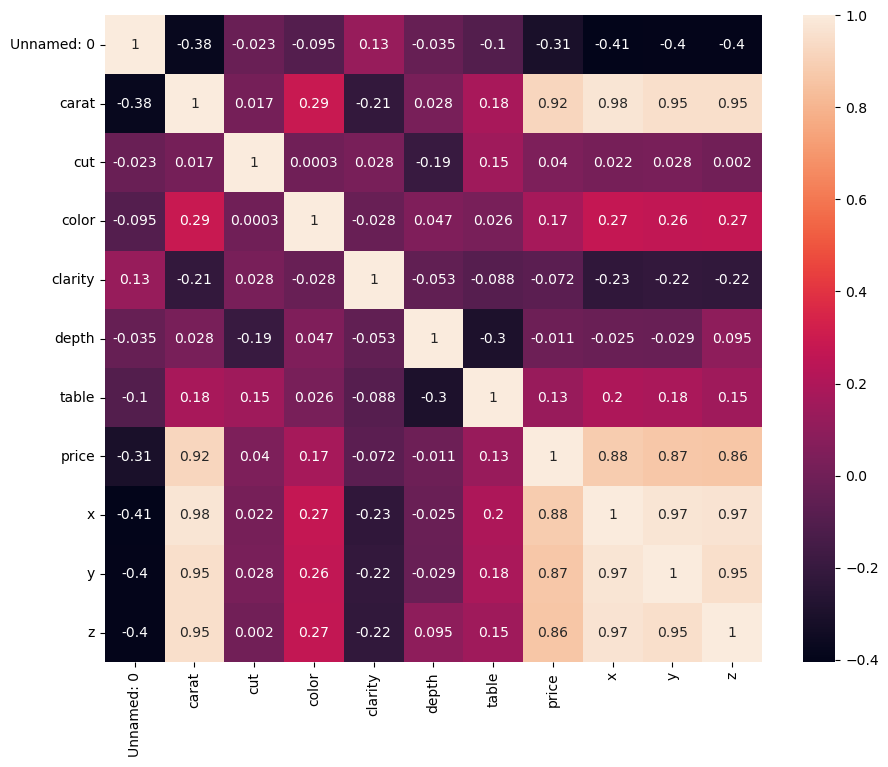

In [43]:
cor = df.corr()
plt.figure(figsize=(10.6, 8.4))  # Width: 10.6 inches, Height: 8.4 inches
sns.heatmap(cor, annot = True)

In [52]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

# Assuming 'df' is your DataFrame
var_thr = VarianceThreshold(threshold=0.7)  # Set the variance threshold
var_thr.fit(df)  # Fit the VarianceThreshold to the data

# Create a DataFrame to display the variances and selected status for each column
variance_info = pd.DataFrame({
    'Feature': df.columns,
    'Variance': var_thr.variances_,
    'Selected': var_thr.get_support()
})

# Print the variance threshold information
print(variance_info)


       Feature      Variance  Selected
0   Unnamed: 0  2.424603e+08      True
1        carat  2.246825e-01     False
2          cut  1.056164e+00      True
3        color  2.893704e+00      True
4      clarity  2.974159e+00      True
5        depth  2.052366e+00      True
6        table  4.992856e+00      True
7        price  1.591533e+07      True
8            x  1.258324e+00      True
9            y  1.304447e+00      True
10           z  4.980016e-01     False


In [51]:
# VARIANCE THRESHOLD
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0.7) #Removing both constant and quasi-constant
var_thr.fit(df)

var_thr.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False])

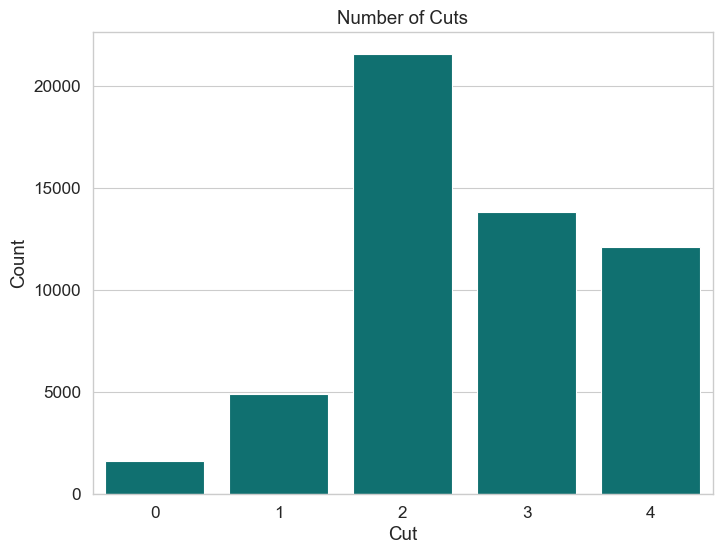

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your diamonds dataset DataFrame

# Count the number of occurrences for each cut category
cut_counts = df['cut'].value_counts()

# Plot the count of cuts
plt.figure(figsize=(8, 6))
sns.barplot(x=cut_counts.index, y=cut_counts.values, color='teal')

# Set labels and title
plt.xlabel('Cut')
plt.ylabel('Count')
plt.title('Number of Cuts')

# Show the plot
plt.show()



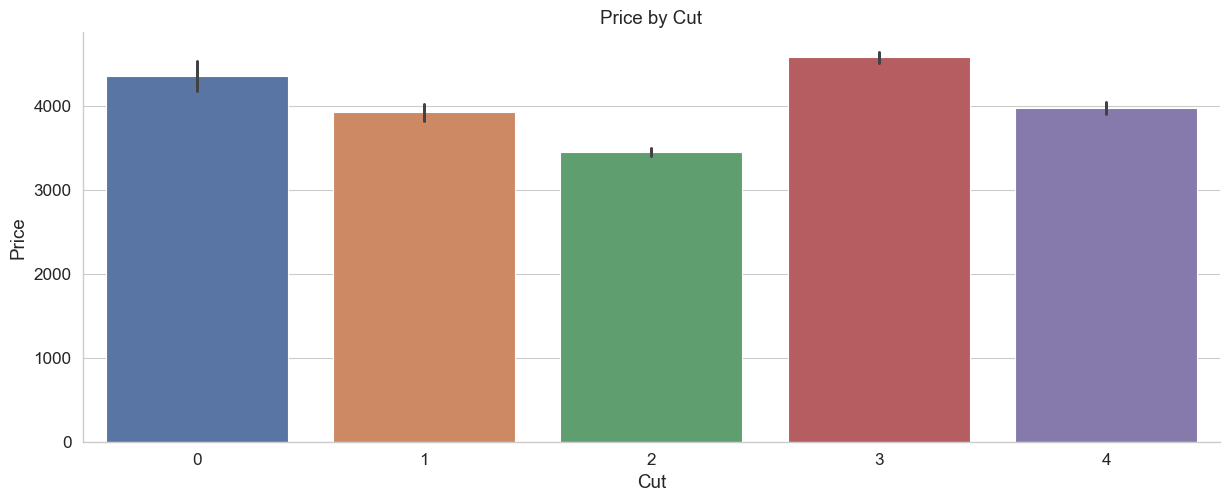

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your diamonds dataset DataFrame

# Set the style and context for the plot
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.4)

# Create the bar graph
p = sns.catplot(x='cut', y='price', data=df, kind='bar', aspect=2.5)

# Set labels and title
plt.xlabel('Cut')
plt.ylabel('Price')
plt.title('Price by Cut')

# Show the plot
plt.show()
